In [1]:
import pandas as pd
import numpy as np
import openpyxl

In [2]:
import requests
import json
import pandas as pd
import time
from datetime import datetime
from os import path
import requests
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np; np.random.seed(0)
from datetime import date
import scipy.stats

In [3]:
#proposals and their status 

In [155]:
df_1 = pd.read_csv('1_dao_v2b.csv')
df_1.head()

,title,post_id,topic_id,vote_stage,winning,referendum_not_winning,valid_non_referendum,user_id_proposer
0,PROPOSAL 2: Hackathons (live or online) in 2022,7939,3100.0,1,0,1,0,NaN
1,WINNING: PROPOSAL 4: Liquidity Incentives,7942,3103.0,1,1,0,0,NaN
2,PROPOSAL 3: Grow the HOPR Hardware Node Network,7941,3102.0,1,0,1,0,NaN
3,PROPOSAL 5: Online Marketing,7943,3104.0,1,0,1,0,NaN
4,PROPOSAL 10: Support strong holders and node r...,8714,3275.0,1,0,1,0,75.0


In [156]:
#creating a column for proposals being considered as valid

In [157]:
df_1["ref"] = 1

In [158]:
refer = df_1[["post_id", "ref"]]

In [159]:
#signitures given to proposals

In [160]:
df_5 = pd.read_csv('5_dao_v2.csv')
df_5.head()

,topic_id,post_id,user_id,if_proposer
0,3139,8096,702,NaN
1,3112,7952,804,NaN
2,3346,9036,1298,NaN
3,3103,7942,691,NaN
4,3103,7942,1292,NaN


In [161]:
#dropping signatures which are not considered

In [162]:
df_5 = pd.merge(df_5, refer, how="outer", on=["post_id"])

In [163]:
df_5 = df_5[df_5['ref'].notna()]

In [165]:
#mergind the proposal and the signiture files

In [166]:
df_p = pd.merge(df_5, df_1, how="outer", on=["topic_id"])
df_p.head()

,topic_id,post_id_x,user_id,if_proposer,ref_x,title,post_id_y,vote_stage,winning,referendum_not_winning,valid_non_referendum,user_id_proposer,ref_y
0,3139.0,8096,702.0,NaN,1.0,Proposal - Node Ecosystem Growth #15,8096,0,0,0,1,789.0,1
1,3139.0,8096,931.0,NaN,1.0,Proposal - Node Ecosystem Growth #15,8096,0,0,0,1,789.0,1
2,3139.0,8096,804.0,NaN,1.0,Proposal - Node Ecosystem Growth #15,8096,0,0,0,1,789.0,1
3,3139.0,8096,376.0,NaN,1.0,Proposal - Node Ecosystem Growth #15,8096,0,0,0,1,789.0,1
4,3139.0,8096,930.0,NaN,1.0,Proposal - Node Ecosystem Growth #15,8096,0,0,0,1,789.0,1


In [167]:
#creating the winning proposer (P_W_P) - prepresents the single winner, coded with 1

In [168]:
d = {'user_id': [100], 'p_w_p': [1]}
df_w = pd.DataFrame(data=d)

In [169]:
#creating the list of winning signitures (P_W_S)

In [170]:
df_5['p_w_s'] = (df_5['post_id'] == 8728) | (df_5['post_id'] == 7942)

In [171]:
df_5['p_w_s'].value_counts()

False    358
True      62
Name: p_w_s, dtype: int64

In [172]:
signit = df_5[df_5['p_w_s'] == False].index
signit

Int64Index([  0,   1,   2,   3,   4,   5,   6,  38,  39,  40,
            ...
            508, 532, 533, 534, 550, 551, 552, 553, 583, 584],
           dtype='int64', length=358)

In [173]:
df_sig = (df_5.drop(signit)).reset_index(drop=True)
df_sig.head()

,topic_id,post_id,user_id,if_proposer,ref,p_w_s
0,3103.0,7942,691.0,NaN,1.0,True
1,3103.0,7942,1292.0,NaN,1.0,True
2,3103.0,7942,827.0,NaN,1.0,True
3,3103.0,7942,597.0,NaN,1.0,True
4,3103.0,7942,1371.0,NaN,1.0,True


In [174]:
p_w_s_sig = pd.DataFrame(df_sig['user_id'].value_counts()).reset_index()

In [175]:
p_w_s = p_w_s_sig.rename(columns={'index': 'user_id', 'user_id':'p_w_s'})

In [176]:
p_w_s['p_w_s'] = p_w_s['p_w_s'].apply(lambda x: 1)
p_w_s.head()

,user_id,p_w_s
0,1344.0,1
1,1103.0,1
2,291.0,1
3,917.0,1
4,810.0,1


In [177]:
#referendum stage proposals

In [178]:
p_r_p = pd.read_csv('p_r_p.csv')

In [179]:
#referendum stage signatures

In [180]:
df_5['p_r_s'] = (df_5['post_id'] == 7939) | (df_5['post_id'] == 7941) | (df_5['post_id'] == 7943) | (df_5['post_id'] == 8714) | (df_5['post_id'] == 9036) | (df_5['post_id'] == 7946) | (df_5['post_id'] == 8698) | (df_5['post_id'] == 8649) | (df_5['post_id'] == 8691) | (df_5['post_id'] == 8652) | (df_5['post_id'] == 8680) | (df_5['post_id'] == 9027) | (df_5['post_id'] == 8640)

In [181]:
signit_r = df_5[df_5['p_r_s'] == False].index
signit_r

Int64Index([  0,   1,   2,   3,   4,   5,   6,  71,  72,  73,  74,  75,  76,
             77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
             90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
            103, 104, 105, 106, 368, 369, 370, 371, 372, 373, 374, 375, 376,
            377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
            390, 391, 392, 393, 502, 503, 504, 505, 506, 507, 508, 532, 533,
            534, 550, 551, 552, 553, 583, 584],
           dtype='int64')

In [182]:
df_sig_r = (df_5.drop(signit_r)).reset_index(drop=True)
df_sig_r

,topic_id,post_id,user_id,if_proposer,ref,p_w_s,p_r_s
0,3346.0,9036,1298.0,NaN,1.0,False,True
1,3346.0,9036,1375.0,NaN,1.0,False,True
2,3346.0,9036,1355.0,NaN,1.0,False,True
3,3346.0,9036,1341.0,NaN,1.0,False,True
4,3346.0,9036,1359.0,NaN,1.0,False,True
...,...,...,...,...,...,...,...
330,3255.0,8640,1377.0,NaN,1.0,False,True
331,3255.0,8640,847.0,NaN,1.0,False,True
332,3255.0,8640,1307.0,NaN,1.0,False,True
333,3255.0,8640,697.0,NaN,1.0,False,True


In [183]:
p_r_s = df_sig_r['user_id'].value_counts()

In [184]:
p_r_s = pd.DataFrame(p_r_s.reset_index())
p_r_s

,index,user_id
0,697.0,7
1,1371.0,6
2,1166.0,6
3,38.0,6
4,1307.0,6
...,...,...
143,1329.0,1
144,71.0,1
145,47.0,1
146,74.0,1


In [185]:
p_r_s = p_r_s.rename(columns={'index': 'user_id', 'user_id':'p_r_s'})
p_r_s

,user_id,p_r_s
0,697.0,7
1,1371.0,6
2,1166.0,6
3,38.0,6
4,1307.0,6
...,...,...
143,1329.0,1
144,71.0,1
145,47.0,1
146,74.0,1


In [186]:
p_r_s['p_r_s'] = p_r_s['p_r_s'].apply(lambda x: 1)
p_r_s.head()

,user_id,p_r_s
0,697.0,1
1,1371.0,1
2,1166.0,1
3,38.0,1
4,1307.0,1


In [187]:
#valid proposals, which didn't reach the referendum stage

In [188]:
p_p_p = pd.read_csv('p_p_p.csv')

In [189]:
#user subfile

In [190]:
us_vo_00 = pd.DataFrame(df_5['user_id'].value_counts()).reset_index()
us_vo_00

,index,user_id
0,1371.0,7
1,697.0,7
2,38.0,7
3,1166.0,6
4,1307.0,6
...,...,...
159,672.0,1
160,602.0,1
161,547.0,1
162,1362.0,1


In [191]:
us_vo_0 = us_vo_00.rename(columns={'index': 'user_id', 'user_id':'number_of_signitures'})
us_vo_0

,user_id,number_of_signitures
0,1371.0,7
1,697.0,7
2,38.0,7
3,1166.0,6
4,1307.0,6
...,...,...
159,672.0,1
160,602.0,1
161,547.0,1
162,1362.0,1


In [192]:
#merging the user dataframe ("us_vo") with the proposal and signature dataframes 

In [193]:
us_vo_0 =  pd.merge(us_vo_0, df_w, how="outer", on=["user_id"])

In [194]:
us_vo =  pd.merge(us_vo_0, p_w_s, how="outer", on=["user_id"])

In [195]:
us_vo_1 =  pd.merge(us_vo, p_r_p, how="outer", on=["user_id"])

In [196]:
us_vo_2 =  pd.merge(us_vo_1, p_r_s, how="outer", on=["user_id"])

In [197]:
us_vo_3 =  pd.merge(us_vo_2, p_p_p, how="outer", on=["user_id"])
us_vo_3

,user_id,number_of_signitures,p_w_p,p_w_s,p_r_p,p_r_s,p_p_p
0,1371.0,7.0,NaN,1.0,NaN,1.0,NaN
1,697.0,7.0,NaN,NaN,NaN,1.0,1.0
2,38.0,7.0,NaN,1.0,NaN,1.0,NaN
3,1166.0,6.0,NaN,NaN,NaN,1.0,NaN
4,1307.0,6.0,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...
165,588.0,NaN,NaN,NaN,1.0,NaN,NaN
166,53.0,NaN,NaN,NaN,1.0,NaN,NaN
167,789.0,NaN,NaN,NaN,NaN,NaN,1.0
168,709.0,NaN,NaN,NaN,NaN,NaN,1.0


In [198]:
#adding the distribution to the user file (D_P_L, D_U_L, U_T_T)

In [199]:
df_6 =  pd.read_csv('6_dao_v2.csv')
df_6.dtypes

user_id                                 int64
total_allocation_distribution         float64
allocation_from_contribution_d_p_l    float64
allocation_from_likes_d_u_l           float64
allocation_from_3p3l_u_t_t            float64
dtype: object

In [200]:
df_6['user_id'] = df_6['user_id'].fillna(0)

In [204]:
df_p1 = pd.merge(us_vo_3, df_6, how='outer', on=["user_id"])

In [205]:
# adding miscellaneous M_O_C 

In [206]:
df_7 = pd.read_csv('7_dao_v2.csv')

In [207]:
df_p2 =  pd.merge(df_p1, df_7, how="outer", on=["user_id"])

In [208]:
#adding miscellaneous M_E_R

In [209]:
df_8 = pd.read_csv('8_dao_v2.csv')
df_8.head()

,user_id,payout_coef_m_e_r
0,74,0.005
1,275,0.005
2,709,0.005
3,810,0.005
4,922,0.005


In [210]:
df_p3 =  pd.merge(df_p2, df_8, how="outer", on=["user_id"])
df_p3.head()

,user_id,number_of_signitures,p_w_p,p_w_s,p_r_p,p_r_s,p_p_p,total_allocation_distribution,allocation_from_contribution_d_p_l,allocation_from_likes_d_u_l,allocation_from_3p3l_u_t_t,payout_coef_m_o_c,payout_coef_m_e_r
0,1371.0,7.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,697.0,7.0,NaN,NaN,NaN,1.0,1.0,0.001786,0.001786,NaN,NaN,0.001685,NaN
2,38.0,7.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.001685,NaN
3,1166.0,6.0,NaN,NaN,NaN,1.0,NaN,0.001786,0.001786,NaN,NaN,0.001685,NaN
4,1307.0,6.0,NaN,NaN,1.0,1.0,NaN,0.011786,0.001786,0.01,NaN,0.001685,NaN


In [211]:
#adding miscellaneous M_C

In [212]:
df_9 = pd.read_csv('9_dao_v2.csv')

In [213]:
df_p4 = pd.merge(df_p3, df_9, how="outer", on=["user_id"])

In [214]:
#adding user addresses

In [215]:
df_10 = pd.read_csv('10_dao_v2.csv')
df_11 = pd.read_csv('11_dao_nft_v2.csv')

In [216]:
df_p5 = pd.merge(df_p4, df_10, how="outer", on=["user_id"])

In [217]:
df_p6 = pd.merge(df_p5, df_11, how="outer", on=["user_id"])

In [218]:
#removing admins

In [219]:
admin = pd.read_csv('admin.csv')

In [220]:
df_p6 = pd.merge(df_p6, admin, how="left", on=["user_id"])
df_p6

,user_id,number_of_signitures,p_w_p,p_w_s,p_r_p,p_r_s,p_p_p,total_allocation_distribution,allocation_from_contribution_d_p_l,allocation_from_likes_d_u_l,allocation_from_3p3l_u_t_t,payout_coef_m_o_c,payout_coef_m_e_r,payout_coef_m_c,username_lower_x,add,username_lower_y,nft_add,is_there
0,1371.0,7.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,curly,0x8467F76ba0b033232e37C9b8CC4C28756400553a,curly,0x8467F76ba0b033232e37C9b8CC4C28756400553a,NaN
1,697.0,7.0,NaN,NaN,NaN,1.0,1.0,0.001786,0.001786,NaN,NaN,0.001685,NaN,NaN,ragws13,0x993192a774609176f59325E9C0aFd0641917D0DB,ragws13,0x993192a774609176f59325E9C0aFd0641917D0DB,NaN
2,38.0,7.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.001685,NaN,NaN,lau.thomas,0x56d53a4402A7b8F4aD027cfb421fF60e865F665b,lau.thomas,0x56d53a4402A7b8F4aD027cfb421fF60e865F665b,NaN
3,1166.0,6.0,NaN,NaN,NaN,1.0,NaN,0.001786,0.001786,NaN,NaN,0.001685,NaN,NaN,satopin,0x5Fe9a92531Fe648666551a6cBaE2A7b817249c52,satopin,0x5Fe9a92531Fe648666551a6cBaE2A7b817249c52,NaN
4,1307.0,6.0,NaN,NaN,1.0,1.0,NaN,0.011786,0.001786,0.01,NaN,0.001685,NaN,0.005556,jones_05,0x09E3c4bf50a15225d4087FE089282CB5506DCce6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,1234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rapid,0x9F65fdda92e0f9f4638A36C7f98BC3702eD9fe9F,NaN
618,1252.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oneyummii,0xD0B744A3CEE6C07814a889ecd4ebb3dA1D4252D1,NaN
619,1224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paulo,0xE6388E11B9B27e9A0D48e7dE6ed8314fbF14074f,NaN
620,1334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,luismipr,0xEa62580397c84E5F17e1adA2035b995c593aeeAB,NaN


In [221]:
df_p6 = df_p6.fillna(0)

In [222]:
ad_out = df_p6[ df_p6['is_there'] == 1 ].index

In [223]:
df_p6.drop(ad_out, inplace=True)

In [224]:
df_p6

,user_id,number_of_signitures,p_w_p,p_w_s,p_r_p,p_r_s,p_p_p,total_allocation_distribution,allocation_from_contribution_d_p_l,allocation_from_likes_d_u_l,allocation_from_3p3l_u_t_t,payout_coef_m_o_c,payout_coef_m_e_r,payout_coef_m_c,username_lower_x,add,username_lower_y,nft_add,is_there
0,1371.0,7.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,curly,0x8467F76ba0b033232e37C9b8CC4C28756400553a,curly,0x8467F76ba0b033232e37C9b8CC4C28756400553a,0.0
1,697.0,7.0,0.0,0.0,0.0,1.0,1.0,0.001786,0.001786,0.00,0.0,0.001685,0.0,0.000000,ragws13,0x993192a774609176f59325E9C0aFd0641917D0DB,ragws13,0x993192a774609176f59325E9C0aFd0641917D0DB,0.0
2,38.0,7.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.00,0.0,0.001685,0.0,0.000000,lau.thomas,0x56d53a4402A7b8F4aD027cfb421fF60e865F665b,lau.thomas,0x56d53a4402A7b8F4aD027cfb421fF60e865F665b,0.0
3,1166.0,6.0,0.0,0.0,0.0,1.0,0.0,0.001786,0.001786,0.00,0.0,0.001685,0.0,0.000000,satopin,0x5Fe9a92531Fe648666551a6cBaE2A7b817249c52,satopin,0x5Fe9a92531Fe648666551a6cBaE2A7b817249c52,0.0
4,1307.0,6.0,0.0,0.0,1.0,1.0,0.0,0.011786,0.001786,0.01,0.0,0.001685,0.0,0.005556,jones_05,0x09E3c4bf50a15225d4087FE089282CB5506DCce6,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,1234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0,0,rapid,0x9F65fdda92e0f9f4638A36C7f98BC3702eD9fe9F,0.0
618,1252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0,0,oneyummii,0xD0B744A3CEE6C07814a889ecd4ebb3dA1D4252D1,0.0
619,1224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0,0,paulo,0xE6388E11B9B27e9A0D48e7dE6ed8314fbF14074f,0.0
620,1334.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0,0,luismipr,0xEa62580397c84E5F17e1adA2035b995c593aeeAB,0.0


In [225]:
#calculating coef in the proposal section

In [226]:
df_p6['p_w_p'].value_counts()

0.0    618
1.0      1
Name: p_w_p, dtype: int64

In [227]:
df_p6['p_w_p'] = df_p6['p_w_p']*0.05

In [228]:
df_p6['p_w_s'].value_counts()

0.0    561
1.0     58
Name: p_w_s, dtype: int64

In [229]:
df_p6['p_w_s'] = 0.05/58*(df_p6['p_w_s'])

In [230]:
df_p6['p_r_p'].value_counts()

0.0    610
1.0      9
Name: p_r_p, dtype: int64

In [231]:
df_p6['p_r_p'] = 0.075/9*df_p6['p_r_p']

In [232]:
df_p6['p_r_s'].value_counts()

0.0    472
1.0    147
Name: p_r_s, dtype: int64

In [233]:
df_p6['p_r_s'] = 0.075/147*df_p6['p_r_s']

In [234]:
df_p6['p_p_p'].value_counts()

0.0    613
1.0      6
Name: p_p_p, dtype: int64

In [235]:
df_p6['p_p_p'] = 0.10/6*df_p6['p_p_p']

In [236]:
#frequencies in the rest 

In [237]:
df_p6['allocation_from_contribution_d_p_l'].value_counts()

0.000000    563
0.001786     56
Name: allocation_from_contribution_d_p_l, dtype: int64

In [238]:
df_p6['allocation_from_likes_d_u_l'].value_counts()

0.00    609
0.01     10
Name: allocation_from_likes_d_u_l, dtype: int64

In [239]:
df_p6['allocation_from_3p3l_u_t_t'].value_counts()

0.000    617
0.075      2
Name: allocation_from_3p3l_u_t_t, dtype: int64

In [240]:
df_p6['payout_coef_m_o_c'].value_counts()

0.000000    530
0.001685     89
Name: payout_coef_m_o_c, dtype: int64

In [241]:
df_p6['payout_coef_m_e_r'].value_counts()

0.000    609
0.005     10
Name: payout_coef_m_e_r, dtype: int64

In [242]:
df_p6['payout_coef_m_c'].value_counts()

0.000000    610
0.005556      9
Name: payout_coef_m_c, dtype: int64

In [243]:
#calculating total share

In [244]:
df_p6['total_coef'] = df_p6['p_w_p'] + df_p6['p_w_s'] + df_p6['p_r_p'] + df_p6['p_r_s'] + df_p6['p_p_p'] + df_p6['total_allocation_distribution'] + df_p6['payout_coef_m_o_c'] + df_p6['payout_coef_m_e_r'] + df_p6['payout_coef_m_c']

In [245]:
df_p6['score'] = df_p6["total_coef"]*50000

In [246]:
df_p6 = (df_p6.sort_values(by='score', ascending=False)).reset_index(drop=True)

In [247]:
df_p6['score'].sum()

47500.0000005

In [248]:
#dropping the users with no distribution

In [249]:
empty_wal = df_p6[ df_p6['score'] == 0 ].index

In [250]:
df_p6.drop(empty_wal, inplace=True)

In [251]:
#binning and tagging with status based on forum activity

In [252]:
bin_labels = ['Dimond', 'Gold', 'Silver', 'Bronz']
df_p6['NFT_status'] = pd.qcut(df_p6.index, q=4, labels=bin_labels)

In [253]:
df_p6['NFT_status'].value_counts()

Dimond    48
Bronz     47
Silver    47
Gold      47
Name: NFT_status, dtype: int64

In [254]:
df_p6.head(15)

,user_id,number_of_signitures,p_w_p,p_w_s,p_r_p,p_r_s,p_p_p,total_allocation_distribution,allocation_from_contribution_d_p_l,allocation_from_likes_d_u_l,...,payout_coef_m_e_r,payout_coef_m_c,username_lower_x,add,username_lower_y,nft_add,is_there,total_coef,score,NFT_status
0,75.0,4.0,0.00,0.000000,0.008333,0.00051,0.000000,0.086786,0.001786,0.01,...,0.005,0.005556,svd,0x2916D837B5F3D4E83df9c6DB717356Bd89C6e9A5,0,0,0.0,0.107870,5393.510026,Dimond
1,933.0,0.0,0.00,0.000000,0.000000,0.00000,0.000000,0.086786,0.001786,0.01,...,0.000,0.000000,0,0,0,0,0.0,0.088471,4423.555377,Dimond
2,100.0,0.0,0.05,0.000000,0.000000,0.00000,0.000000,0.011786,0.001786,0.01,...,0.000,0.005556,aleks,0x0C1633e0BA164a9DEf56d86d7c46afCBe4d28a77,aleks,0x0C1633e0BA164a9DEf56d86d7c46afCBe4d28a77,0.0,0.069027,3451.333155,Dimond
3,383.0,3.0,0.00,0.000000,0.000000,0.00051,0.016667,0.010000,0.000000,0.01,...,0.000,0.005556,lukey,0xfEA310e868466201E881866e75232e1Bc2B86E0c,0,0,0.0,0.034418,1720.890978,Dimond
4,1307.0,6.0,0.00,0.000000,0.008333,0.00051,0.000000,0.011786,0.001786,0.01,...,0.000,0.005556,jones_05,0x09E3c4bf50a15225d4087FE089282CB5506DCce6,0,0,0.0,0.027870,1393.510026,Dimond
5,1295.0,5.0,0.00,0.000000,0.008333,0.00051,0.000000,0.011786,0.001786,0.01,...,0.000,0.005556,shhs,0xb731eF1D26227e1EdF48F9833E6B48EB11154917,shhs,0xb731eF1D26227e1EdF48F9833E6B48EB11154917,0.0,0.027870,1393.510026,Dimond
6,810.0,3.0,0.00,0.000862,0.000000,0.00051,0.000000,0.011786,0.001786,0.01,...,0.005,0.005556,tolon,0x253a1dc6BBad8A62a8e8F7B21214FEa2B78CB77E,tolon,0x253a1dc6BBad8A62a8e8F7B21214FEa2B78CB77E,0.0,0.025399,1269.946808,Dimond
7,709.0,0.0,0.00,0.000000,0.000000,0.00000,0.016667,0.000000,0.000000,0.00,...,0.005,0.000000,kander,0xbF5C8925cCdbE4Ff933a739e51DcDd74FDd78d32,0,0,0.0,0.023352,1167.602996,Dimond
8,275.0,0.0,0.00,0.000000,0.000000,0.00000,0.000000,0.010000,0.000000,0.01,...,0.005,0.005556,0,0,0,0,0.0,0.022241,1112.047441,Dimond
9,917.0,5.0,0.00,0.000862,0.008333,0.00051,0.000000,0.000000,0.000000,0.00,...,0.005,0.005556,tenbka,0x65C13724928ea0AfA68e09c7b70449bB8f6f3Fc8,tenbka,0x65C13724928ea0AfA68e09c7b70449bB8f6f3Fc8,0.0,0.021947,1097.327760,Dimond


first_shot = df_p6.filter(['user_id', 'username_lower_x','score','NFT_status'], axis=1)
first_shot

In [255]:
#Voting addresses based on snapshot 

In [256]:
vote_report_d = pd.read_csv('snapshot-report-d.csv')
vote_report_h = pd.read_csv('snapshot-report-h.csv')

In [257]:
vote_hopr = pd.DataFrame(vote_report_h['address'])
vote_dai = pd.DataFrame(vote_report_d['address'])

In [258]:
vote = (pd.concat([vote_hopr, vote_dai])).reset_index(drop=True)

In [259]:
vote['address'] = vote['address'].str.lower()

In [260]:
df_vote = (vote.groupby(['address']).agg({'address': ['count']} )).reset_index(drop=False)
df_vote

address      
                                                count
0    0x0057bd83a142da84b6404616c683e21e7dd6fa5f     2
1    0x0235db3d9de8f976044e67eb464b18b2f0fd4894     2
2    0x039b86bfa3dc5553b907e26172692c29a39b6087     1
3    0x03f182ec7474877ec8d830a5fcb804fd132755c1     2
4    0x045795ff0b8c353290a900654514032e92c289b7     2
..                                          ...   ...
302  0xfc5b2d51fd03b13bf440eb9e0c7b1d94b1b77bb9     2
303  0xfd3719bef669f5cebbda47b69e7814cf413e9517     2
304  0xfd9c2676e9322fd6d8028d59d2135b2fb5cbdb14     2
305  0xfea310e868466201e881866e75232e1bc2b86e0c     2
306  0xfef5ea9673d8dc1461dc3e6218c3dbcb3e70b939     2

[307 rows x 2 columns]

In [261]:
df_vote.columns = ["nft_add", "vote_count"]

In [262]:
df_vote["voter"] = 1 

In [263]:
df_p6['nft_add'] = df_p6['nft_add'].str.lower()

In [264]:
#merging the addresses from the forum data and from the snapshot

In [265]:
df_p7 = pd.merge(df_p6, df_vote, how="outer", on=["nft_add"])

In [266]:
df_p7['NFT_status'].isna().sum()

237

In [267]:
#giving every user at least "bronze" status - hence the only voting participants did not necesairly participated in the forum discussion

In [268]:
df_p7['NFT_status'] = df_p7["NFT_status"].fillna(method="ffill")

In [269]:
df_p7["NFT_status"].value_counts()

Bronz     284
Dimond     48
Silver     47
Gold       47
Name: NFT_status, dtype: int64

In [271]:
#share checking

In [272]:
df_p7['total_allocation_distribution'].sum()

0.350000000044

In [273]:
df_p7['payout_coef_m_o_c'].sum()

0.14999999996199997

In [274]:
df_p7['payout_coef_m_e_r'].sum()

0.05

In [275]:
df_p7['payout_coef_m_c'].sum()

0.050000000004

In [276]:
df_p7['score'].fillna(0)

0      5393.510026
1      4423.555377
2      1720.890978
3      1393.510026
4      1167.602996
          ...     
421       0.000000
422       0.000000
423       0.000000
424       0.000000
425       0.000000
Name: score, Length: 426, dtype: float64

pd.options.display.float_format = '{:,.0f}'.format

In [277]:
col=np.array(df_p7['score'], np.int16)

In [278]:
df_p7['score_int']=col

In [279]:
df_p7

,user_id,number_of_signitures,p_w_p,p_w_s,p_r_p,p_r_s,p_p_p,total_allocation_distribution,allocation_from_contribution_d_p_l,allocation_from_likes_d_u_l,...,add,username_lower_y,nft_add,is_there,total_coef,score,NFT_status,vote_count,voter,score_int
0,75.0,4.0,0.0,0.0,0.008333,0.00051,0.000000,0.086786,0.001786,0.01,...,0x2916D837B5F3D4E83df9c6DB717356Bd89C6e9A5,0,NaN,0.0,0.107870,5393.510026,Dimond,NaN,NaN,5393
1,933.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.086786,0.001786,0.01,...,0,0,NaN,0.0,0.088471,4423.555377,Dimond,NaN,NaN,4423
2,383.0,3.0,0.0,0.0,0.000000,0.00051,0.016667,0.010000,0.000000,0.01,...,0xfEA310e868466201E881866e75232e1Bc2B86E0c,0,NaN,0.0,0.034418,1720.890978,Dimond,NaN,NaN,1720
3,1307.0,6.0,0.0,0.0,0.008333,0.00051,0.000000,0.011786,0.001786,0.01,...,0x09E3c4bf50a15225d4087FE089282CB5506DCce6,0,NaN,0.0,0.027870,1393.510026,Dimond,NaN,NaN,1393
4,709.0,0.0,0.0,0.0,0.000000,0.00000,0.016667,0.000000,0.000000,0.00,...,0xbF5C8925cCdbE4Ff933a739e51DcDd74FDd78d32,0,NaN,0.0,0.023352,1167.602996,Dimond,NaN,NaN,1167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0xfb2165f4abeed496b4edd3234c4cc09f1557226e,NaN,NaN,NaN,Bronz,2.0,1.0,0
422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0xfba05c94cb4628d5046ff384920d22d0c1374e44,NaN,NaN,NaN,Bronz,2.0,1.0,0
423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0xfd3719bef669f5cebbda47b69e7814cf413e9517,NaN,NaN,NaN,Bronz,2.0,1.0,0
424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0xfd9c2676e9322fd6d8028d59d2135b2fb5cbdb14,NaN,NaN,NaN,Bronz,2.0,1.0,0


second_sho = df_p7.filter(['user_id', 'username_lower_x','score_int','NFT_status', 'vote_count','voter'], axis=1)
second_sho

In [280]:
df_p7.to_csv('dao_eval.csv')

allocation = df_p6.filter(['user_id','total_coef','score','NFT_status'], axis=1)

allocation.to_csv('allocations.csv')

In [282]:
y = df_p6['total_coef']
x = df_p6['user_id']

<function matplotlib.pyplot.show(*args, **kw)>

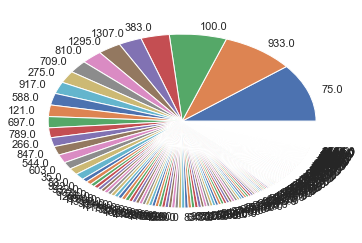

In [283]:
plt.pie(y, labels=x)
plt.show

In [284]:
#vote analitics 

In [285]:
vote_report_d = vote_report_d.fillna(0)
vote_report_h = vote_report_h.fillna(0)

In [286]:
vote_report_d.head(25)

,address,choice.6,balance,timestamp,dateUtc,authorIpfsHash,choice.2,choice.1,choice.3,choice.4,choice.7,choice.5
0,0x8D1F338F8abd714fd09ec13C100A0d7dF693cd5D,1.0,4178.137845,1634646982,"Tue, 19 Oct 2021 12:36:22 GMT",QmTJfZWMe1CrF5eYR2jEXJN5oS5x954VFekuVpqDJBUEFi,0.0,0.0,0.0,0.0,0.0,0.0
1,0x0c47c5F0d8AA01470095149A63ee69cb60ada1b1,1.0,4000.000000,1634646995,"Tue, 19 Oct 2021 12:36:35 GMT",QmbAyUbr5gfQDeT5e7Uxf2osgbYV2ScW39KcJJsbh6Xh3G,0.0,0.0,0.0,0.0,0.0,0.0
2,0x7ce7099C33E2C27375e80d4e0B1b6584F69b3544,1.0,4000.000000,1634647029,"Tue, 19 Oct 2021 12:37:09 GMT",QmcSqpUjebdv5ev5S4hdTHiMzquw3Zui4SkpGk8qhBYEUq,0.0,0.0,0.0,0.0,0.0,0.0
3,0xEd4B6F0a0497164CC0A66585F1F6839DD38a7D0D,1.0,4000.000000,1634647049,"Tue, 19 Oct 2021 12:37:29 GMT",QmUikS75vA8LmXTg6wSe8JrhXh6H5fsixsg7J8abyzWj2K,0.0,0.0,0.0,0.0,0.0,0.0
4,0x762c0e5Ae9d4C726f9Ee112Cc66eD5f11566a8d0,1.0,21135.034083,1634647214,"Tue, 19 Oct 2021 12:40:14 GMT",QmaX4GMxs5k7kcMN4NsyRCAzLs5GedfMv8QyV5CcUM7oKE,1.0,0.0,0.0,0.0,0.0,0.0
5,0x4a2Dd4b190B6Dee6939709278b659eD5Ffcb9d92,0.0,10064.395660,1634647247,"Tue, 19 Oct 2021 12:40:47 GMT",QmWkrYwTEvRqwCnXvUJ3Chc1zgwQebu9ZVXt4WaqaLc22c,0.0,1.0,1.0,1.0,0.0,0.0
6,0x0d36dD40FF721aC6E3f40FC3e36A5566609A03F1,0.0,6491.769069,1634647260,"Tue, 19 Oct 2021 12:41:00 GMT",QmY6UzZA5ebhmspRB7uHqchKZx1aXLLdf97Au3ghPNo43U,0.0,0.0,1.0,0.0,0.0,0.0
7,0x138308323652eDd886A1418A80ee5e74A1bc1503,0.0,15318.269630,1634647568,"Tue, 19 Oct 2021 12:46:08 GMT",QmZCxYPaGZbabrX2tNBnbY6vZ626PHoDzNnD9dCPHYLb39,1.0,0.0,1.0,0.0,0.0,0.0
8,0x253a1dc6BBad8A62a8e8F7B21214FEa2B78CB77E,0.0,65252.411900,1634647596,"Tue, 19 Oct 2021 12:46:36 GMT",QmQySPGu8hcXjwhEefQgWLpMFSPVm8mGrX9UEMGFaabEsA,0.0,0.0,0.0,0.0,1.0,0.0
9,0xED5A1aa5687DE0f9dA5BF4c662665eB7387189Eb,100.0,418.207677,1634647837,"Tue, 19 Oct 2021 12:50:37 GMT",QmVbYt5w4MEC8tnLmZN3MEjYVmK1cAhkzuFS1gHbWUExT8,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
vote_report_d['choice.1'] = vote_report_d['choice.1'].apply(lambda x: 1 if x != 0 else 0)
vote_report_d['choice.2'] = vote_report_d['choice.2'].apply(lambda x: 1 if x != 0 else 0)
vote_report_d['choice.3'] = vote_report_d['choice.3'].apply(lambda x: 1 if x != 0 else 0)
vote_report_d['choice.4'] = vote_report_d['choice.4'].apply(lambda x: 1 if x != 0 else 0)
vote_report_d['choice.5'] = vote_report_d['choice.5'].apply(lambda x: 1 if x != 0 else 0)
vote_report_d['choice.6'] = vote_report_d['choice.6'].apply(lambda x: 1 if x != 0 else 0)
vote_report_d['choice.7'] = vote_report_d['choice.7'].apply(lambda x: 1 if x != 0 else 0)

In [288]:
vote_report_h['choice.1'] = vote_report_h['choice.1'].apply(lambda x: 1 if x != 0 else 0)
vote_report_h['choice.2'] = vote_report_h['choice.2'].apply(lambda x: 1 if x != 0 else 0)
vote_report_h['choice.3'] = vote_report_h['choice.3'].apply(lambda x: 1 if x != 0 else 0)
vote_report_h['choice.4'] = vote_report_h['choice.4'].apply(lambda x: 1 if x != 0 else 0)
vote_report_h['choice.5'] = vote_report_h['choice.5'].apply(lambda x: 1 if x != 0 else 0)

In [289]:
vote_report_d['choices'] = vote_report_d['choice.1'] + vote_report_d['choice.2'] + vote_report_d['choice.3'] + vote_report_d['choice.4'] + vote_report_d['choice.5'] + vote_report_d['choice.6'] + vote_report_d['choice.7']

In [290]:
vote_report_h['choices'] = vote_report_h['choice.1'] + vote_report_h['choice.2'] + vote_report_h['choice.3'] + vote_report_h['choice.4'] + vote_report_h['choice.5']

In [291]:
vote_report_d['choices'].value_counts()

1    171
2     52
3     31
7     12
4      7
Name: choices, dtype: int64

In [292]:
vote_report_h['choices'].value_counts()

1    158
2     68
3     38
5     17
4     15
Name: choices, dtype: int64